In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("penguins.csv")
df.head(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [20]:
df.shape

(333, 7)

In [21]:
df.memory_usage()

Index                2664
species              2664
island               2664
bill_length_mm       2664
bill_depth_mm        2664
flipper_length_mm    2664
body_mass_g          2664
sex                  2664
dtype: int64

# Exploratory Data Analysis (EDA)

In [7]:
df.sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

In [8]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [10]:
sex_mapping = {'FEMALE': 0, 'MALE': 1}
species_mapping = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
island_mapping = {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}

df['sex'] = df['sex'].map(sex_mapping)
df['species'] = df['species'].map(species_mapping)
df['island'] = df['island'].map(island_mapping)

In [11]:
# df["sex"], _ = pd.factorize(df["sex"])
# df["species"], _ = pd.factorize(df["species"])
# df["island"], _ = pd.factorize(df["island"])

In [12]:
df.head(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,1
1,0,0,39.5,17.4,186.0,3800.0,0
2,0,0,40.3,18.0,195.0,3250.0,0
4,0,0,36.7,19.3,193.0,3450.0,0


In [13]:
df.island.unique()

array([0, 1, 2], dtype=int64)

<IPython.core.display.Javascript object>


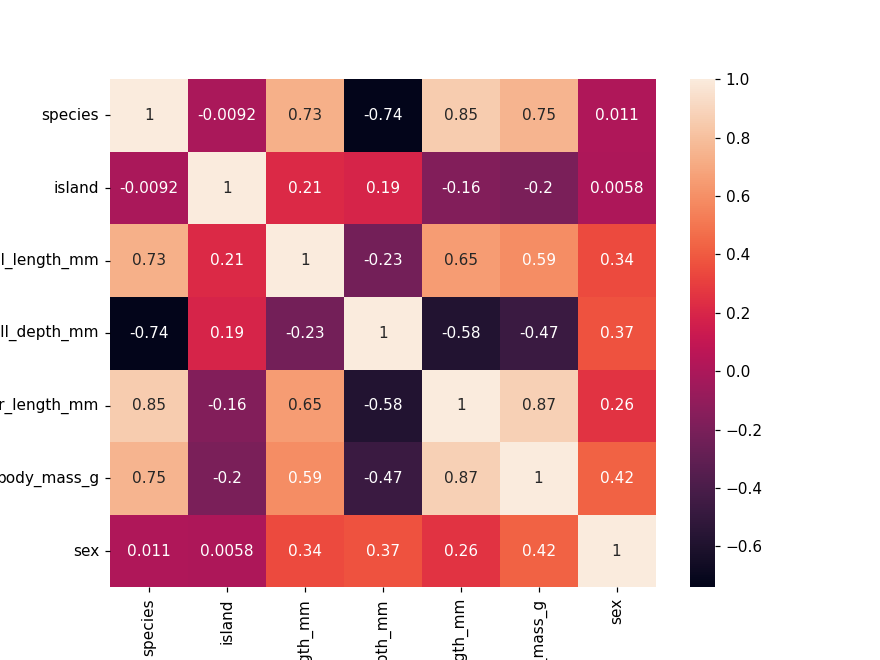

<AxesSubplot:>

In [14]:
df2 = df.corr()
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df2, annot=True)

### It appears there is no correlation between penguin sex and either of penguin species or island where they are found.

# Model Building

In [15]:
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = df["sex"]

## Using sklearn.pipeline.Pipeline Class

In [16]:
# Create a pipeline for the Decision Tree
dt_pipeline = Pipeline([
    ('preprocessing', StandardScaler()),  # Example preprocessing step
    ('classifier', DecisionTreeClassifier())
])

# Create a pipeline for the Random Forest
rf_pipeline = Pipeline([
    ('preprocessing', StandardScaler()),  # Example preprocessing step
    ('classifier', RandomForestClassifier())
])

# Create a VotingClassifier using the individual pipelines
ensemble_model = VotingClassifier(
    estimators=[('decision_tree', dt_pipeline), ('random_forest', rf_pipeline)],
    voting='hard'  # 'soft' for weighted voting based on probabilities
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

ensemble_model.fit(X_train, y_train)

accuracy = ensemble_model.score(X_test, y_test)
print(f"Ensemble Model Accuracy: {accuracy:.2f}")

Ensemble Model Accuracy: 0.90


## Using sklearn.pipeline.make_pipeline Function

In [17]:
# Create a pipeline for the Decision Tree
dt_pipeline = make_pipeline(
    StandardScaler(),  # Example preprocessing step
    DecisionTreeClassifier()
)

# Create a pipeline for the Random Forest
rf_pipeline = make_pipeline(
    StandardScaler(),  # Example preprocessing step
    RandomForestClassifier()
)

# Create a VotingClassifier using the individual pipelines
ensemble_model = VotingClassifier(
    estimators=[('decision_tree', dt_pipeline), ('random_forest', rf_pipeline)],
    voting='hard'  # 'soft' for weighted voting based on probabilities
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

ensemble_model.fit(X_train, y_train)

accuracy = ensemble_model.score(X_test, y_test)
print(f"Ensemble Model Accuracy: {accuracy:.2f}")

Ensemble Model Accuracy: 0.90


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create individual models
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = SVC()

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train individual models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# Make predictions using each model
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

# Combine predictions (you can use any logic for combining predictions)
#ensemble_pred = (pred1 + pred2) / 2  # For example, simple averaging

# Evaluate the ensemble
ensemble_accuracy = accuracy_score(y_test, pred1)
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.2f}")


Ensemble Model Accuracy: 0.85


In [25]:
import os

In [26]:
os.mkdir("../Working on Datetime Data")